# Predicting creditcard approvals

## Plan<br>
0. Import packages
1. Investigate data
2. Clean data
3. EDA
4. Build model do this with a pipeline

## Import packages

We are probably going to use np, pd, plt<br>
Classification models --> knn, logistic-regression<br>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Investigate data

In [60]:
# import data
df = pd.read_csv('cc_approvals.data', names=['colName_{}'.format(i) for i in range(16)])
df.head()

,colName_0,colName_1,colName_2,colName_3,colName_4,colName_5,colName_6,colName_7,colName_8,colName_9,colName_10,colName_11,colName_12,colName_13,colName_14,colName_15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Data dictionary
Features (X)
- Gender
- Age
- Debt
- Married
- BankCustomer
- EducationLevel
- Ethnicity
- YearsEmployed
- PriorDefault
- Employed
- CreditScore
- DriversLicense
- Citizen
- ZipCode
- Income

Target variable (y)
- ApprovalStatus

In [61]:
# rename data columns
COLUMN_NAMES = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', \
    'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', \
    'ApprovalStatus']
FEATURES = COLUMN_NAMES[:-1]
TARGET_VAR = COLUMN_NAMES[-1:]
df.columns = COLUMN_NAMES
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Check each feature
- Check null values + look for hidden nulls
- Check appropriate data types
- Come up with cleaning strategy

In [62]:
# check for null values
print(df.info())
print()
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None


             D

no true nulls, have to find hidden nulls

In [63]:
# separate categorical features and numerical features
data_types = dict(df.dtypes)
FEATURES_CAT = []
FEATURES_NUM = []
for col_name, data_type in data_types.items():
    if data_type == 'object':
        FEATURES_CAT.append(col_name)
    else:
        FEATURES_NUM.append(col_name)

In [64]:
# finding hidden nulls for categorical features

# get unique values for all categorical features
for cat_feat in FEATURES_CAT:
    unique_categories = list(df[cat_feat].unique())
    print('({}) unique values:'.format(cat_feat))
    if len(unique_categories) >= 20:
        print('More than 20 unique values')
        print('First five values {}'.format(unique_categories[:5]))
    else:
        print(sorted(unique_categories))
    print()

(Gender) unique values:
['?', 'a', 'b']

(Age) unique values:
More than 20 unique values
First five values ['30.83', '58.67', '24.50', '27.83', '20.17']

(Married) unique values:
['?', 'l', 'u', 'y']

(BankCustomer) unique values:
['?', 'g', 'gg', 'p']

(EducationLevel) unique values:
['?', 'aa', 'c', 'cc', 'd', 'e', 'ff', 'i', 'j', 'k', 'm', 'q', 'r', 'w', 'x']

(Ethnicity) unique values:
['?', 'bb', 'dd', 'ff', 'h', 'j', 'n', 'o', 'v', 'z']

(PriorDefault) unique values:
['f', 't']

(Employed) unique values:
['f', 't']

(DriversLicense) unique values:
['f', 't']

(Citizen) unique values:
['g', 'p', 's']

(ZipCode) unique values:
More than 20 unique values
First five values ['00202', '00043', '00280', '00100', '00120']

(ApprovalStatus) unique values:
['+', '-']



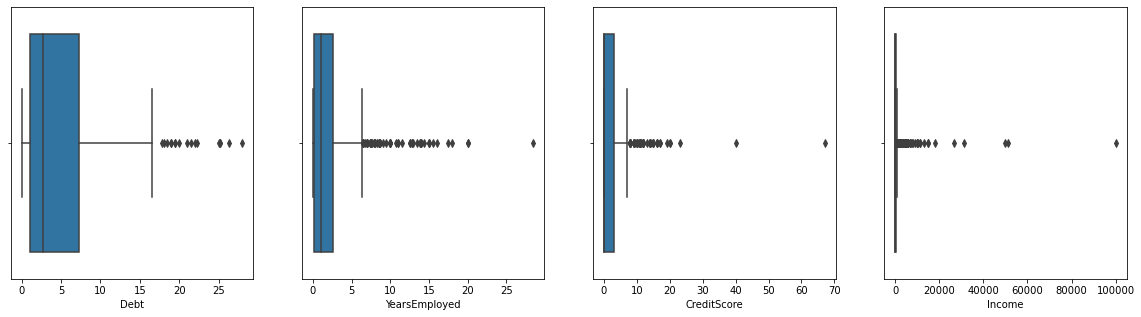

In [65]:
# look for outliers in numerical features
# boxplots
fig, ax = plt.subplots(1, len(FEATURES_NUM), figsize=(20,5))
for i in range(len(FEATURES_NUM)):
    _ = sns.boxplot(ax=ax[i], data=df, x=FEATURES_NUM[i])
plt.show()

Summary<br>
Change data types:
- Age --> float

Hidden nulls for other columns are in the form of '?'
- Impute with mean for numerical variables --> to be done later in preprocessing
- Impute strategy for cat variables --> not that much, we'll just drop those rows
 



## Clean data

In [66]:
# replace "?" with nulls
df.replace("?", np.nan, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          678 non-null    object 
 1   Age             678 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         677 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None


### change datatype and drop rows with null categories

In [67]:
# change age to numeric
df['Age'] = pd.to_numeric(df['Age'])
# replace null numeric values with mean
# consider using imputer in our pipeline later

In [68]:
# drop rows with incomplete categorical features input
df.dropna(axis=0, subset=FEATURES_CAT, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          653 non-null    object 
 1   Age             653 non-null    float64
 2   Debt            653 non-null    float64
 3   Married         653 non-null    object 
 4   BankCustomer    653 non-null    object 
 5   EducationLevel  653 non-null    object 
 6   Ethnicity       653 non-null    object 
 7   YearsEmployed   653 non-null    float64
 8   PriorDefault    653 non-null    object 
 9   Employed        653 non-null    object 
 10  CreditScore     653 non-null    int64  
 11  DriversLicense  653 non-null    object 
 12  Citizen         653 non-null    object 
 13  ZipCode         653 non-null    object 
 14  Income          653 non-null    int64  
 15  ApprovalStatus  653 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.7+ KB
None


## EDA

## Data Preprocessing
Numerical features<br>
- mean imputation
- scaling (optional)

Categorical features<br>
- create dummies